# Lab 3 - Elements of Visualization

This is the third lab where we will start covering the elements of visualization. We will look at the **data types and visual variables**, and learn how to use visual variables to represent data effectively. For this lab, we will refer to the slides in the file  [L3_DataViz_Elements.pdf](L3_DataViz_Elements.pdf).


---

## Data Sets and Data Types 

Understanding the **taxonomy of data sets and data types** is important for choosing the right visual variables to represent them. 

In the previous lab, we have seen that understanding the nature of the data helps us to choose the most efficient color palette; similarly, **choice of visual variables depend on the data types and data set types.** 

Data sets can be analyzed in a number of different taxonomies; one such categorization is:

* **1D data**: this is the dataset type with only one dimension; it can contain a set (arbitrary order), or a sequence (defined order). It can also contain 1D time series data, although one might want to treat temporal data as a separate data type. 

* **2D data, 3D data, nD data**: Main difference between 2-3D data and multidimensional data is the ease of visualization. 2D and 3D data can be directly visualized, whereas representing data in more than 3 dimensions require either data reduction, cluster visualization techniques, or use of separable visual variables. A special type of 2D data is spatial data where dimensions correspond to geographical locations. 3D data may also refer to the data used for volume rendering for scientific visualization. 

* **Temporal data**: This can be simply 1D data or may have more dimensions that have intrinsic temporal meaning. There are some visualization techniques more suitable for temporal data, so this type of data set can be treated as a separate type. 

* **Graphs**: This type of data set contains entities and relations between entities that can be visualized as graphs (networks, trees). 

* **Text**: Text itself can also be an unstructured data set, and special visual representations can be used to visualize it (e.g. word clouds, bag of words histograms, etc).

As we will see later, there are other taxonomies possible for data sets. For example, according to one taxonomy, one type is *table* which includes 1D, 2D, 3D, nD, and temporal data set types, and another type is *network* which is the graph type we discussed above. 

---

### Data Types 

Each data set can contain different **data types**. For our current discussion, we categorize the data types in three ways:

* **NOMINAL**: This is the data type that has **no intrinsic ordering, and usually no quantitative value**. It is also called categorical type, or label type. 

  An Example of this data type would be a **fruits** attribute in a data set where it takes values such as *apples*, *oranges*, *bananas*, etc. If a data set has a category or class attribute, it is usually nominal. 
  
  Note that numbers also can be nominal/categorical if they simply represent labels with **no way to order** or compare them meaningfully. 

* **ORDINAL**: This data type obeys a **less-than relation**; the items can be ordered, even though they are not necessarily numerical. 

  For example, an attribute of **length** can have the values *tall*, or *regular*, or *short*, or an attribute of **density** can be *high*, *mid*, or *low*. Even though they are not numbers, they can be compared and ordered. 

* **QUANTITATIVE**: this data type contains numbers we can do *arithmetic* with. **It is meaningful to add them or compute ratios of them**. 

  There are two types:
    * **Interval**: this type of data **does not have a "true zero"**. We can't compare them directly; only the distance between two data items can be compared meaningfully. 
    
      For example, **location** is a type of data that has no "beginning point"; we can only compare the distances between  locations. **Date** is similarly an interval data type.      
      
    * **Ratio**: This type has a **fixed zero**; origin is meaningful. Comparisons are made by computing the ratio, or proportion of some measure. 
    
      For example, **length** and **mass** are ratio types; **length** is the measurement of some entity in proportion to a unit length, and **mass** is the measurement in proportion to a unit mass. They can be zero. 
      
    


---

### Data Model vs. Conceptual Model

**Data model is the low level description of a data type such as 1D floats, or 2D integers, etc.** 

**Conceptual model is the *semantics* of the data type: what it represents, or how to reason with it.** 

For example, a **temperature** attribute can be represented by a **numeric data model** such as 77.5, 32.4, -4.3. Its conceptual model tells us what numbers mean, and what we can do with them. 

**Temperature** can be represented with different data types, for example:

* **Quantitative**: it can be floating point numbers measured in a continuous space using some unit (e.g. Fahrenheit).


* **Ordinal**: in some data set, **temperature** may only be represented as *hot*, *warm*, *cold*, etc. We **can still order** the values of this data type.


* **Nominal**: If **temperature** has a slightly different meaning in a data set corresponding to the state of some physical object, one could use *burned*, or *not burned*. This type of data is categorical, there is **no** ordering. 



**It is important to understand the conceptual model of the data set attributes in order to classify them into one of the above data types.** 

For example, **not all numeric values are necessarily quantitative**. Take a look at the example in **slide #5** in [L3_DataViz_Elements.pdf](L3_DataViz_Elements.pdf):

<img src="../images/types.png">

* **Order date** is a **quantitative** attribute; it is an interval type. We can **compute the difference** between two dates, and we can **order** them. 

* **Order priority** and **Product Container** attributes are **ordinal**; we can order them even though they are not numbers. 

* **Order ID** seems to be a quantitative attribute; but in fact **it is not**. Even though it's numeric, the actual ID number is only a label, there is no point in adding two order IDs, for example. One might think that it is ordinal as in it can be ordered, but an Order ID can contain any arbitrary numbers to represent things such as customer number, store number, etc. This attribute is **nominal**. 

---

Let's take a look at a data set:

In [1]:

fishcatch_data=read.csv("/dsa/data/all_datasets/fishcatch/fishcatch.csv")
head(fishcatch_data)


X,obs,species,weight,length1,length2,length3,height,width,sex
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,1,242,23.2,25.4,30.0,38.4,13.4,NA
2,2,1,290,24.0,26.3,31.2,40.0,13.8,NA
3,3,1,340,23.9,26.5,31.1,39.8,15.1,NA
4,4,1,363,26.3,29.0,33.5,38.0,13.3,NA
5,5,1,430,26.5,29.0,34.0,36.6,15.1,NA
6,6,1,450,26.8,29.7,34.7,39.2,14.2,NA


The dataset is about 158 fish that are caught and measured. They belong to seven different species.

Let's take a look at the structure of the data frame: 


In [2]:
str(fishcatch_data)
head(fishcatch_data)

'data.frame':	158 obs. of  10 variables:
 $ X      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ obs    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ species: int  1 1 1 1 1 1 1 1 1 1 ...
 $ weight : num  242 290 340 363 430 450 500 390 450 500 ...
 $ length1: num  23.2 24 23.9 26.3 26.5 26.8 26.8 27.6 27.6 28.5 ...
 $ length2: num  25.4 26.3 26.5 29 29 29.7 29.7 30 30 30.7 ...
 $ length3: num  30 31.2 31.1 33.5 34 34.7 34.5 35 35.1 36.2 ...
 $ height : num  38.4 40 39.8 38 36.6 39.2 41.1 36.2 39.9 39.3 ...
 $ width  : num  13.4 13.8 15.1 13.3 15.1 14.2 15.3 13.4 13.8 13.7 ...
 $ sex    : int  NA NA NA NA NA NA NA NA NA NA ...


X,obs,species,weight,length1,length2,length3,height,width,sex
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,1,242,23.2,25.4,30.0,38.4,13.4,NA
2,2,1,290,24.0,26.3,31.2,40.0,13.8,NA
3,3,1,340,23.9,26.5,31.1,39.8,15.1,NA
4,4,1,363,26.3,29.0,33.5,38.0,13.3,NA
5,5,1,430,26.5,29.0,34.0,36.6,15.1,NA
6,6,1,450,26.8,29.7,34.7,39.2,14.2,NA


**Can you identify the data types of the variables?**

**obs (observations), sex, and species** can be considered as **nominal** variables. sex and species are categories, there is no less than relationship among them, even though species is encoded as numbers. **obs** is the observation number, it is numeric, yet the order of observation does not seem to be important, so it is nominal, too.


Variables **height, length1, length2, length3, weight, and width** are all **quantitative** variables: they are ratios as they are measured with respect to a unit. We can compare them, order them, they can be zero.


---

## Visual Variables 

In written communication, we use letters that represent sounds; and when arranged in a particular way, they represent spoken words. Similarly, there are also visual "letters" in visual communication that can be arranged in order to convey information. They are called **visual variables** or **channels**. 

They were first developed for cartography by a French cartographer, Jacques Bertin. He describes **marks** as the basic units to represent some information, and **visual variables** to modify these marks. 
**Marks** are points, lines, areas, surfaces, volumes, links, and containment. Visual variables modify these marks to encode data. Here are Bertin's visual variables: 

### Position

**Position** encodes the location of a mark (e.g. point). It is the **strongest visual variable**, as we can easily distinguish points in different locations, group them, estimate the distance between them, and naturally understand the distribution of data by looking at them. 

  For example, a **scatter plot is a visualization that uses the *position* visual variable to encode 2D data.** 
  
  **Position** is a suitable visual variable for **all** data types. For example, a scatter plot does not have to have numerical axes, we can still distinguish between marks, and **group** them easily when looking at the positions of the points that represent data items in a 2D plot. 
  
  <img src="../images/position.png">
  
  In the above example, we can easily distinguish between A, B, C; we see that B is between A and C, and we can estimate that BC is twice as long as AB. 
  
  **All this information is simply encoded by the positions of A, B, C.** 
  
  One problem with **position** is that in can lead to a cluttered view of data for too many data points. We will see how we can deal with that later. 

### Size, Length, Area 

These three are good visual variables. They can encode data to make it easy to compare (such as big vs. small), and they support perceptual grouping (review previous week's material), so they are **efficient** variables for preattentive processing. 

They give us the ability to **judge differences**; for example, aligned bars give us instant comparison between two data items. Even if not aligned, change in length of a mark is a good visual representation to compare the data items. 

Changes in area are still preattentive, but harder to judge linearly. For example, circles of different size can encode data items, but it is harder for human visual system to judge if a circle is twice as big as another one in comparison to two aligned bars. 

### Shape

**Shape** is good for representing **nominal** data types. It does **not support ordering or grouping**. We cannot naturally order shapes such as a star is greater than a circle, etc. 

### Texture

**Texture** is a visual variable that should be used when only black and white representation is available as it can get very confusing if using too many textures on a map for example. 

### Value

This is actually the grayscale (lightness) variable. If used for nominal data types, it can be preattentive (stands out) for a small number of values. Too many shades are not easily distinguishable, and also may give the impresion of ordering, so it should not be used for nominal type if the number of categories is large. It is also very useful visual variable for quantitative data type. 


### Color

**Color** in the domain of maps (cartography) is surprisingly not as strong of a variable as the size or position. We have seen the pitfalls regarding the use of color previously. Its use for nominal, ordinal, and quantitative data **should follow** the guidelines we discussed in the previous week. 

We should try to avoid color if we can encode our data by using position, size, and length variables for data sets with few attributes. 

---

**We assign visual variables to data attributes by using the aesthetics in ggplot.**

Here, we create a scatterplot where x and y positions (visual variables) represent species and weight (data attributes). `geom_point` creates the points in the scatter plot. 

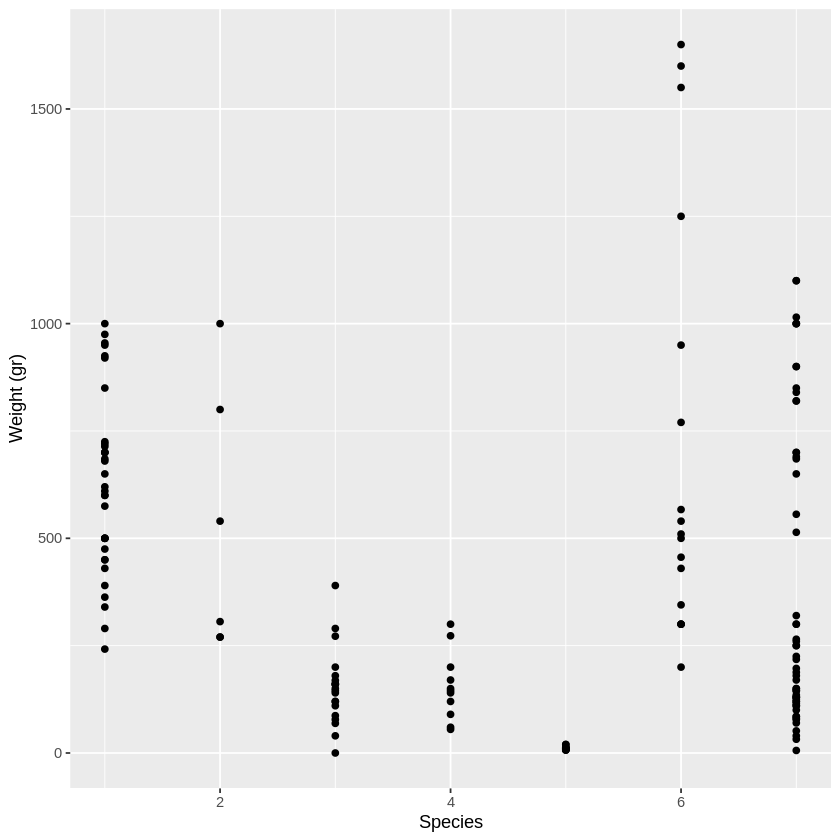

In [3]:

library(ggplot2)

g <- ggplot(fishcatch_data, aes(x=species, y=weight)) + xlab("Species") + ylab("Weight (gr)")
g + geom_point()

**We can see some species have a smaller range of weight while others have a larger range. Perceptual grouping is enabled by the position visual variables.** 

We can use **geom_jitter()** to randomly place points in a scatter plot to break the grouping along the lines. That would help us to see and compare number points as they would not cover each other any more. 


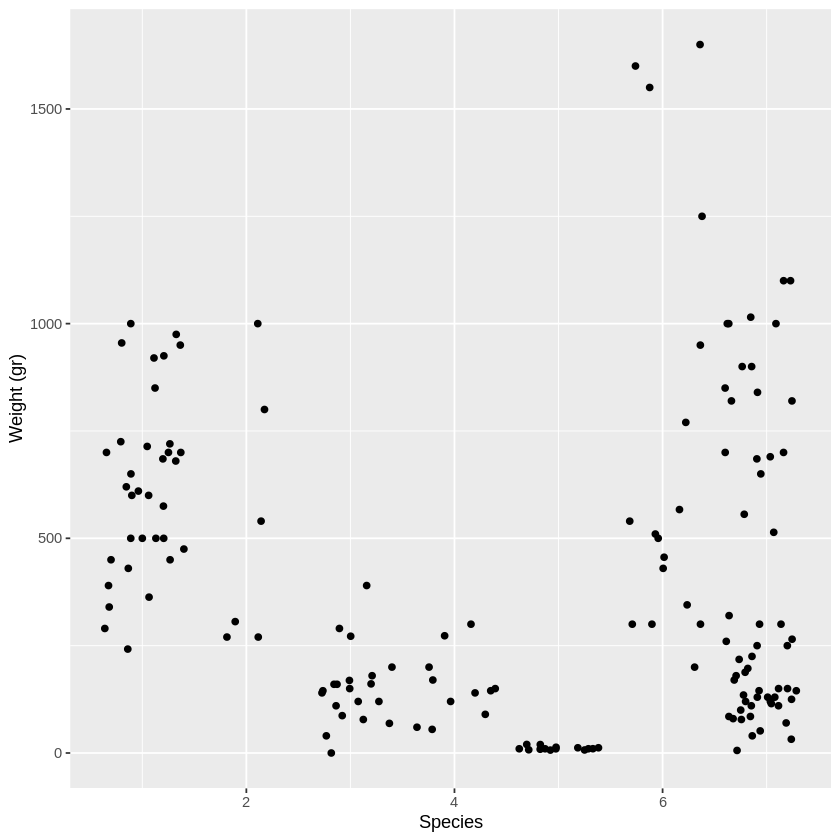

In [4]:
# note that, you don't need the geom_point if you use geom_jitter, it will plot the same data with randomized positions.

g + geom_jitter() 

**We can adjust the width and height of the jitter, and also the transparency.**

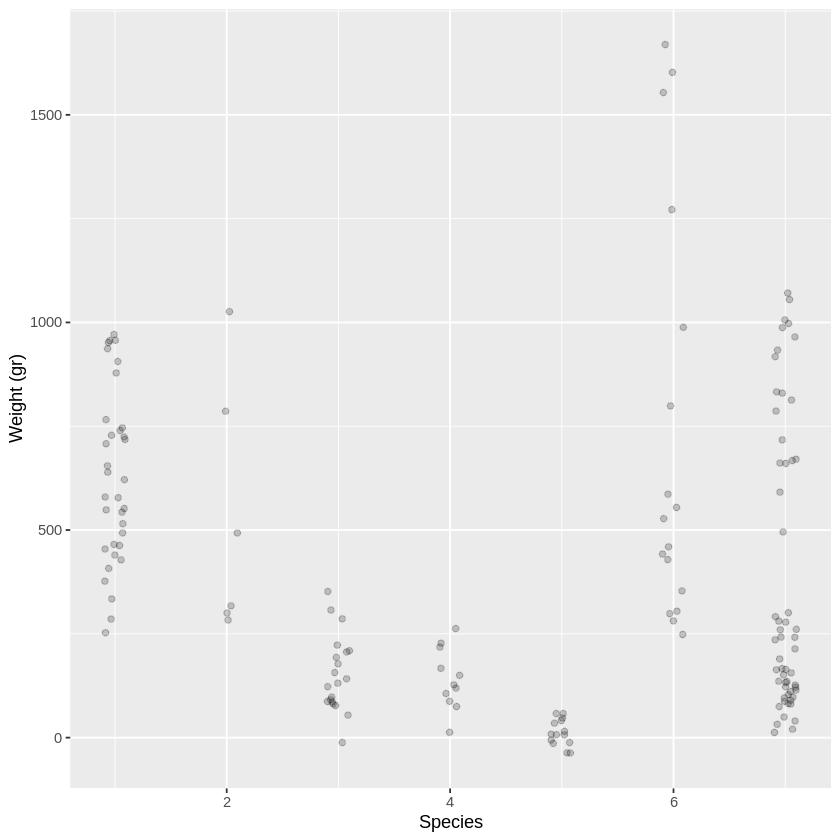

In [5]:
g + geom_jitter(width=0.1, height=50, alpha=0.2)

 **Let's add another visual vaiable: color for sex.**

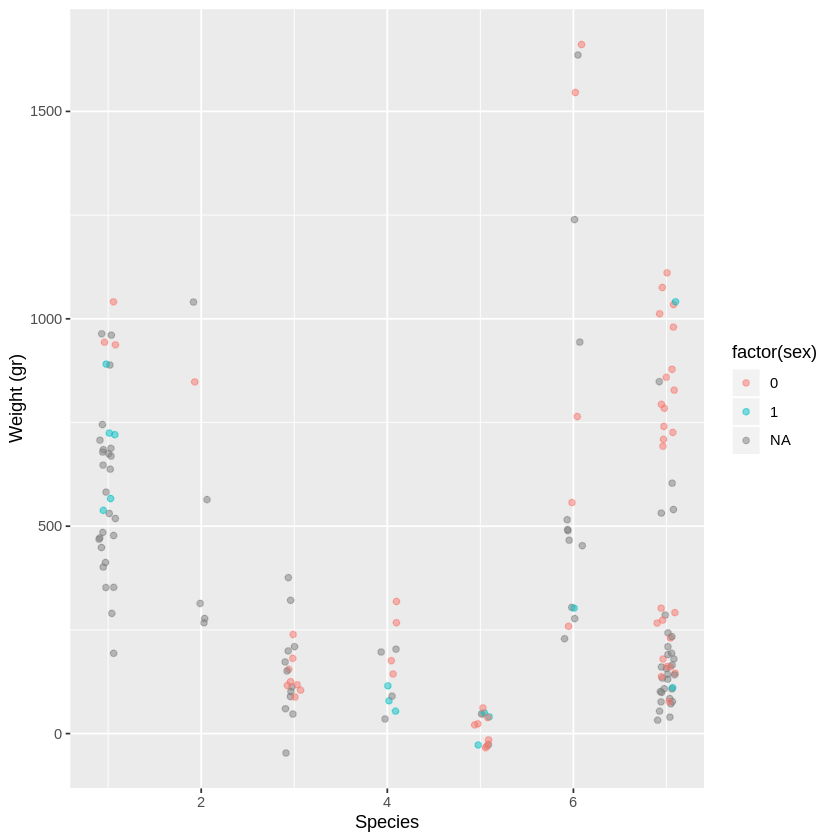

In [6]:

g2 <- ggplot(fishcatch_data, aes(x=species, y=weight, color=factor(sex))) +
 xlab("Species") + 
 ylab("Weight (gr)") + 
 geom_jitter(width=0.1, height=50, alpha=0.5)
g2

Because sex is **categorical**, we converted it to factor to avoid the sequential color scheme. To see what would happen, remove the `factor` and replot. 

There is no immediate grouping here, mainly because the sex is unknown for a lot of fish in this data set. 


**We can keep adding more visual channels (size, shape, etc.), but at some point, separability will suffer as discussed below. We will have a good example of it in the practices.** 


---

## Characteristics of Visual Variables

The choice of visual variable to encode a data type depends on its characteristics (**slide #7** in [L3_DataViz_Elements.pdf](L3_DataViz_Elements.pdf)):

* **Selective**: Does this visual variable make the mark **easily distinguishable** from others? **Shape and color are selective** visual variables; we can easily distinguish marks with different colors, for example. 



* **Associative**: Does this visual variable **support perceptual grouping**? Position is an associative visual variable, we preattentively group marks together based on their positions. 



* **Quantitative**: Can the **difference between two marks** in this visual variable be quantified, or interpreted numerically? Length is a visual variable that is quantitative. 



* **Order**: Does the visual variable **support ordering**? Size and area are orderable visual variables. Color can be ordered **if** a quantitative color palette is chosen. 

---


## Mackinlay's Visual Variables

Jock D. Mackinlay extended this list of visual variables to contain angle, slope, volume, density, saturation, hue, connection, and containment. These variables are all preattentively processed. He also provided a sorting for their accuracy depending on the data type they are used for.

<img src="../images/mackinlay.png">

**For example, length has little use for nominal data type, but is very accurate for encoding the quantitative data type.** 

**Position is very good for all data types.** 

**Texture and shape are not useful at all for quantitative type, but good for nominal type, etc.**

For interactive or animated visualizations, **motion** became a new visual variable that is also preattentitvely processed. Changes in motion such as direction, speed, frequency, etc. are processed preattentively, and can encode data efficiently. 

Take a look at the  **slide #13** in [L3_DataViz_Elements.pdf](L3_DataViz_Elements.pdf) for another ordering of the visual variable efficiency. 

<img src="../images/comp.png">



**The following plot, called Steven's Power Law, depicts the physical stimulus versus its perceived intensity or strength by us.** 

<img src="../images/powerlaw.png">

**Human visual perception underestimates the area and volume, as opposed to the estimation of length which is pretty accurate (linear).** This shows why length is a stronger visual variable than size. we should consider the characteristics of visual variables and the data types when choosing visual variables to encode data. 

---


## Separability of Visual Variables

**We can combine multiple visual variables to encode more attributes.** The question becomes "**which visual variables can be combined and still be preattentively processed?**" 

The following shows some examples of marks and visual variables.

<img src="../images/channels.png">

First plot from left uses the lines as the **mark**, and **length** and **position** as the **visual variables**. 

Second plot uses the points as the **mark**, and **position** as the **visual variable**. 

Third plot **combines two visual variables**: **position** and **color**. 

Fourth plot **combines three visual variables**: **position, color, and size**. 

So far these combinations of visual variables can still be preattentively processed, but **as we increase the number of variables** (e.g. adding different shapes, shades, etc.) there will be **major interference between visual variables.** 

Human visual system will not be able to preattentively process all these channels all at once, and we will have to **consciously go through each channel sequentially to understand and reason; the effectiveness of the visualization will be reduced.** 

**The number of channels does not have to be large for interference either; imagine using rectangles as marks and using height and width of the rectangle as two visual variables to encode two different attributes. This creates interference as we perceive rectangles as a WHOLE, so we will have hard time separating two visual variables length and width.** 

Next week, we will look at effective visualization design principles. **Slide #14** in [L3_DataViz_Elements.pdf](L3_DataViz_Elements.pdf) shows some examples of ineffective visualizations that we will discuss in the next module. You can see some discussion in the below link about efficiency.  
    

---


The following is a simple test of principles of good design. Take this test now, and take again after next week, when we discussed design principles and see if you improved your understanding of efficient design. 

* [Online Design Test](https://www.perceptualedge.com/files/GraphDesignIQ.html)

Unfortunately, this online test requires Adobe Flash which may not be supported by your browser. Instead, you can look at the static version of it and a discussion [in this link](https://medium.com/@extraordinalyst/discussion-on-graph-design-i-q-test-8f48aa4cd01c). 

